# Embedding Preprocessing
Preprocessings for computing and developing embeddings

In [1]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_histogram, labs
import os
from pathlib import Path
import sys
sys.path.append('..')

# add this to you notebook so it automatically reloads code you changed in a python file after importing this code
%load_ext autoreload
%autoreload 2

In [2]:
git_root = Path('..')
data_root = git_root / 'data'
out_root = git_root / 'out'
plot_root = out_root / 'plots'
assert data_root.exists()
if not plot_root.exists():
    plot_root.mkdir(parents=True)

In [8]:
genome_fasta = data_root / 'reference' / 'GRCh38.d1.vd1.fa'
assert genome_fasta.exists()
overlap_path = data_root / 'overlap_genes_peaks.tsv'
assert overlap_path.exists()
epiAneufinder_path = out_root / 'epiAneufinder' / 'epiAneuFinder_results.tsv'
assert epiAneufinder_path.exists() 

## Embedding Computation
Compute embeddings for each dataset.

In [4]:
from src.data.dataset import CopyNumerDNADataset

In [5]:
b1_train_path = data_root / 'batch1_train.tsv'
b1_val_path = data_root / 'batch1_val.tsv'
b1_test_path = data_root / 'batch1_test.tsv'

In [6]:
b1_full_data = out_root / 'preprocessing' / 'classification_median_batch_1.tsv'
b2_full_data = out_root / 'preprocessing' / 'classification_median_batch_2.tsv'

In [7]:
b1_df = pd.read_csv('../out/preprocessing/classification_median_batch_2.tsv', sep='\t')

In [9]:
# compute all embeddings for batch 2
b1_dataset = CopyNumerDNADataset(
    root=data_root / 'embeddings' / 'batch_2' ,
    data_df=b1_df,
    fasta_path=genome_fasta,
    atac_path=overlap_path,
    cnv_path=epiAneufinder_path,
    force_recompute=True,
    embedding_mode='single_gene_barcode'
)

Using 5723 barcode IDs:
ATCTTTGGTACGCGCA-2,CAAACACTCAAGCTTA-2,GCTCACAAGCACTAGT-2,TAGCCTCTCCAAATCA-2,ATGAATGCAATTAGCT-2,CGCAATCCAGCACGTT-2,CGGATTAGTCTATCGT-2,GCCTCGACAGTAATAG-2,TGGACCGGTGTTAAAC-2,CTATTCAGTTCCGGCT-2,GACTTACAGGCGGATG-2,TATGCATCAAGCCACT-2,TTGAGGCGTCGTAATG-2,GAGGCAAGTCAATGTG-2,AAGGATCCATCAGCAC-2,TAGTAAGCAATAAGCA-2,GAAAGGCTCTTGACCC-2,AGTAGCTTCCTTGCAC-2,GTTTGTCGTGGATTAT-2,CTGGTAAGTGCATTAG-2,TGCATGAGTACAATGT-2,CCAGGAACACAATGCC-2,GTAAGGTCAAATATCC-2,TATGACTCAGCTAACC-2,TAGTAGGAGTCCTGAG-2,CGCTTACTCGAGCAAA-2,GCAAGCCTCCTGAGTG-2,GTGAATCTCCTCATGC-2,CTGTTGGAGCTCAAAC-2,CGATTCCTCACTAATG-2,GATTGATGTACCCACC-2,TGAGCTTAGTTATCCT-2,CATGCAAGTAGCTGGT-2,CTTTGAGCACCTCGCT-2,CATCCCAGTGAGGTAG-2,GGTGCTGGTGCTCCGT-2,CACATACAGAATGACG-2,AAACCGCGTGCTAGCG-2,AGTAATGCATGCTATG-2,AAAGCCCGTAAGCTTG-2,TTTCAGTTCATTTGCT-2,GCTGTGCAGTTTGCGG-2,GAGTATCTCACTAGGT-2,GTGCTCCGTCAATAGT-2,TTGCATTTCTATGACA-2,ATAAGCCTCATGTGGT-2,TGGACTAGTGGGTGAA-2,TCTCACCAGGCAGGTG-2,GTTAGGCGTGATGATT-2,ACACTAATCATCACTT-2,GGTATTTCAGCACGAA-2,GGTTTCT

/vol/storage/shared/cmscb8/preprocessing/../src/data/embedding.py:386: UserWarning: [embed]: No CNV data for ATCTTTGGTACGCGCA-2,GCTCACAAGCACTAGT-2,CAAACACTCAAGCTTA-2,TAGCCTCTCCAAATCA-2,ATGAATGCAATTAGCT-2,CGCAATCCAGCACGTT-2,CGGATTAGTCTATCGT-2,GCCTCGACAGTAATAG-2,TGGACCGGTGTTAAAC-2,GACTTACAGGCGGATG-2,TATGCATCAAGCCACT-2,TTGAGGCGTCGTAATG-2,GAGGCAAGTCAATGTG-2,AAGGATCCATCAGCAC-2,TAGTAAGCAATAAGCA-2,GAAAGGCTCTTGACCC-2,AGTAGCTTCCTTGCAC-2,GTTTGTCGTGGATTAT-2,CTGGTAAGTGCATTAG-2,TGCATGAGTACAATGT-2,CCAGGAACACAATGCC-2,GTAAGGTCAAATATCC-2,TATGACTCAGCTAACC-2,TAGTAGGAGTCCTGAG-2,CGCTTACTCGAGCAAA-2,GCAAGCCTCCTGAGTG-2,GTGAATCTCCTCATGC-2,CTGTTGGAGCTCAAAC-2,CGATTCCTCACTAATG-2,GATTGATGTACCCACC-2,TGAGCTTAGTTATCCT-2,CATGCAAGTAGCTGGT-2,CTTTGAGCACCTCGCT-2,CATCCCAGTGAGGTAG-2,GGTGCTGGTGCTCCGT-2,CACATACAGAATGACG-2,AAACCGCGTGCTAGCG-2,AGTAATGCATGCTATG-2,AAAGCCCGTAAGCTTG-2,TTTCAGTTCATTTGCT-2,GCTGTGCAGTTTGCGG-2,GAGTATCTCACTAGGT-2,GTGCTCCGTCAATAGT-2,TTGCATTTCTATGACA-2,ATAAGCCTCATGTGGT-2,TGGACTAGTGGGTGAA-2,TCTCACCAGGCAGGTG-

[embed]: Iterating over all possible barcode-gene combinations
[embed]: Computing Embeddings with mode: "single_gene_barcode"
Using 343 barcodes:
AAACCAACATTGCGGT-2,AAAGCACCAACAGCCT-2,AAAGGCTCAACACCTA-2,AACAAAGGTGTAACCA-2,AACTAGTGTACTGATG-2,AAGCCTCCATTAAGCT-2,AAGCGTTTCGATTATG-2,AAGGATCCAAAGGTAC-2,AATCAGGAGGGTGAAC-2,AATGAAGGTGGGTACT-2,AATGTCCAGCTTTGTT-2,AATTGCTCAGGAATCG-2,AATTGGACAGCCAGAA-2,AATTGGACAGGCTAAG-2,ACACTAATCATCACTT-2,ACACTAATCCGTGACA-2,ACACTAGGTAAACAAG-2,ACAGCCGGTCGTAAAT-2,ACATAGCTCGCACAAT-2,ACATAGCTCGCTCACT-2,ACCAAGTTCTAAGTCA-2,ACCACATAGCTCAATA-2,ACCACATAGTTAGGCT-2,ACCCTGTTCCCGTTAC-2,ACCTGGATCAAACACC-2,ACCTTCATCGTTTCCA-2,ACGCCTAAGCCTGGTA-2,ACGCTTGAGTTATCCT-2,ACGTCAAGTGAGCAAG-2,ACGTCCAAGTTAGTTG-2,ACGTTGTAGTAGGCGG-2,ACTAACCAGACTAAGG-2,ACTAACTCATAAGTTC-2,ACTATGTCAATAAGCA-2,ACTCGCGCATATAACC-2,ACTGAAACATAAACCT-2,ACTTACAAGCATGCAT-2,ACTTGTAAGTAGAGGC-2,ACTTTGTTCTCAATTC-2,AGAATCGAGCTTCCCG-2,AGACACGCACAGAAAC-2,AGAGGAACAGCAAGTG-2,AGAGGATGTGTTTGCT-2,AGCAAATAGGGCCACT-2,AGCAACAAGGTTTGCG-2

[embed]: Computing embeddings:   0%| | 171/427378 [04:00<166:45:21,  1


KeyboardInterrupt: 

## Embedding Developement
This file contains investigations to develope embeddings.
First check is regarding the gene length distribution in our dataset.

In [ ]:
from src.data import generate_fasta_entries, standard_chromosomes

In [ ]:
most_changed_path = data_root + 'most_expression_changed_genes.txt'
overlap_path = data_root + 'overlap_genes_peaks.tsv'

### Gene length distribution
To find a suitable cutoff for receiving the 2000 smallest genes in our dataset, we first have a look at the distribution of gene lengths.

### 2000 most changed genes

In [3]:
most_changed_genes = None
with open(most_changed_path, 'r') as in_file:
    most_changed_genes = [line.strip() for line in in_file]
most_changed_genes[:10]

['ENSG00000000971',
 'ENSG00000002587',
 'ENSG00000002745',
 'ENSG00000002933',
 'ENSG00000003096',
 'ENSG00000004468',
 'ENSG00000004846',
 'ENSG00000004948',
 'ENSG00000005187',
 'ENSG00000005884']

In [6]:
df = pd.read_csv(overlap_path, sep='\t')
df[['Start_peak', 'End_peak', 'Start_gene', 'End_gene']] = df[['Start_peak', 'End_peak', 'Start_gene', 'End_gene']].astype(int)
df['gene_len'] = df['End_gene'] - df['Start_gene']

In [7]:
df = df[df['gene_id'].isin(most_changed_genes)]

/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../../out/plots/most_changed_genes_len_hist.png
/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 44'. Pick better value with 'binwidth'.
/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 44'. Pick better value with 'binwidth'.


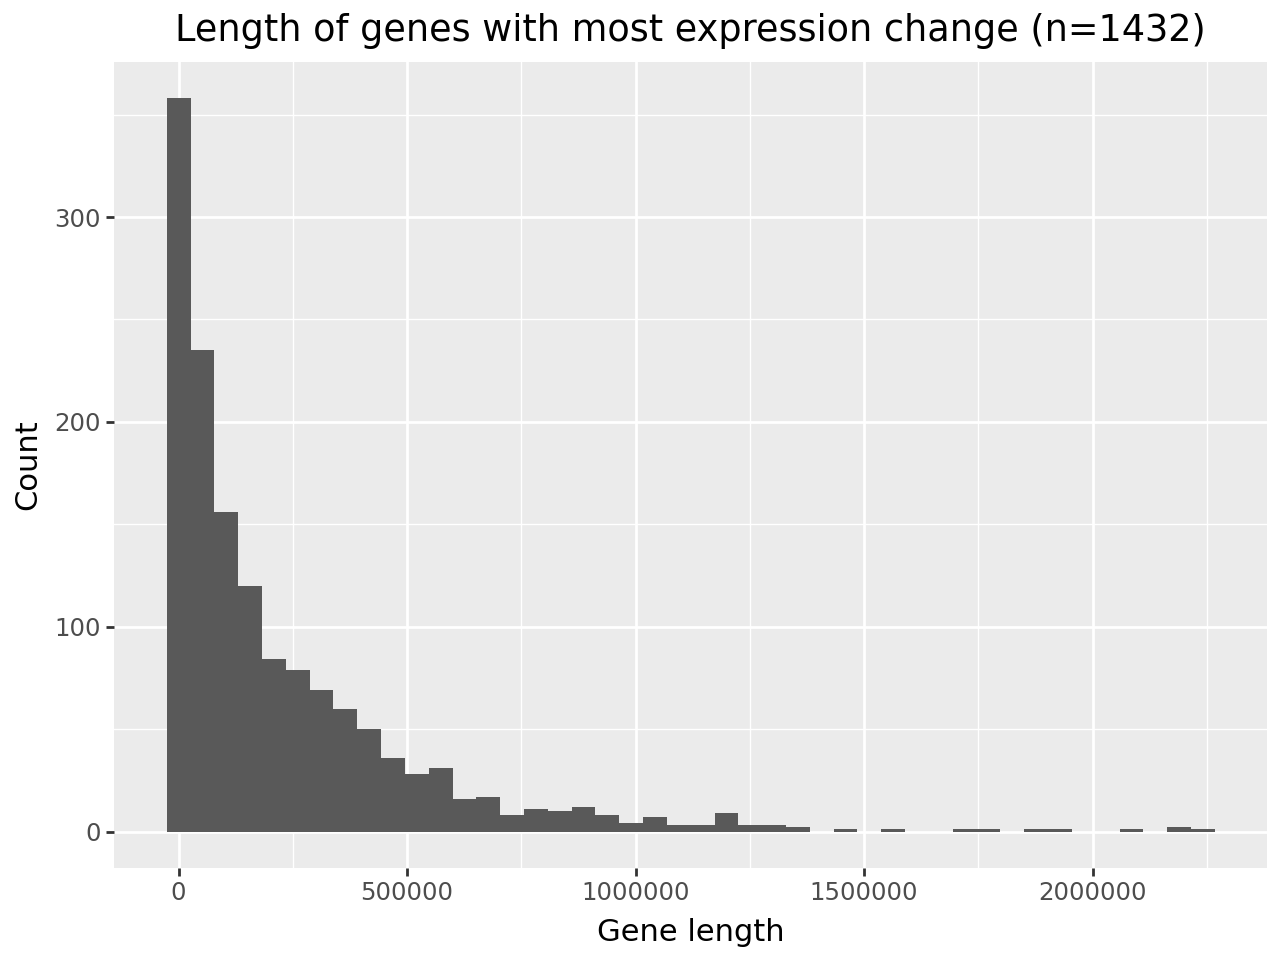

In [13]:
plot_df = df[['gene_id', 'gene_len']].drop_duplicates()
p = ggplot(plot_df, aes(x='gene_len')) + \
    geom_histogram() + \
    labs(title='Length of genes with most expression change (n={})'.format(plot_df.shape[0]), x='Gene length', y='Count')
p.save(filename='most_changed_genes_len_hist.png', format='png', path=plot_root, dpi=300)
p.show()

In [9]:
df = df.sort_values(by=['gene_len'], ascending=False)
df[:10]

,Chromosome,Start_peak,End_peak,Start_gene,End_gene,gene_id,gene_len
91289,X,31266497,31267324,31095677,33341609,ENSG00000198947,2245932
91290,X,31420332,31421239,31095677,33341609,ENSG00000198947,2245932
18011,3,117358547,117359433,115800374,117999592,ENSG00000185565,2199218
18010,3,117278560,117279448,115800374,117999592,ENSG00000185565,2199218
17994,3,116757912,116758804,115800374,117999592,ENSG00000185565,2199218
17996,3,116770556,116771424,115800374,117999592,ENSG00000185565,2199218
18012,3,117997120,117997902,115800374,117999592,ENSG00000185565,2199218
17993,3,116486533,116487423,115800374,117999592,ENSG00000185565,2199218
18005,3,117126774,117127634,115800374,117999592,ENSG00000185565,2199218
18003,3,117102095,117102973,115800374,117999592,ENSG00000185565,2199218


In [15]:
df[df['gene_len'] < 10000]

,Chromosome,Start_peak,End_peak,Start_gene,End_gene,gene_id,gene_len
15170,3,4986557,4987470,4977437,4987323,ENSG00000134107,9886
15166,3,4978319,4979012,4977437,4987323,ENSG00000134107,9886
15167,3,4985399,4986112,4977437,4987323,ENSG00000134107,9886
32587,6,106972219,106972873,106967831,106977627,ENSG00000272398,9796
32589,6,106976362,106977040,106967831,106977627,ENSG00000272398,9796
...,...,...,...,...,...,...,...
30403,6,27807497,27808324,27806173,27810667,ENSG00000196747,4494
30406,6,27809741,27810594,27806173,27810667,ENSG00000196747,4494
1897,1,28246850,28247735,28245144,28249568,ENSG00000271398,4424
78977,18,11857081,11857993,11855155,11859554,ENSG00000272703,4399


With the genes, that show most expression changes, we observe the problem of long sequence length.
I suggest we first filter for feasable embedding length and afterwards for most expression change.

#### All genes

In [12]:
df = pd.read_csv('data/overlap_genes_peaks.tsv', sep='\t')
df[['Start_peak', 'End_peak', 'Start_gene', 'End_gene']] = df[['Start_peak', 'End_peak', 'Start_gene', 'End_gene']].astype(int)
df['gene_len'] = df['End_gene'] - df['Start_gene']

/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 804'. Pick better value with 'binwidth'.


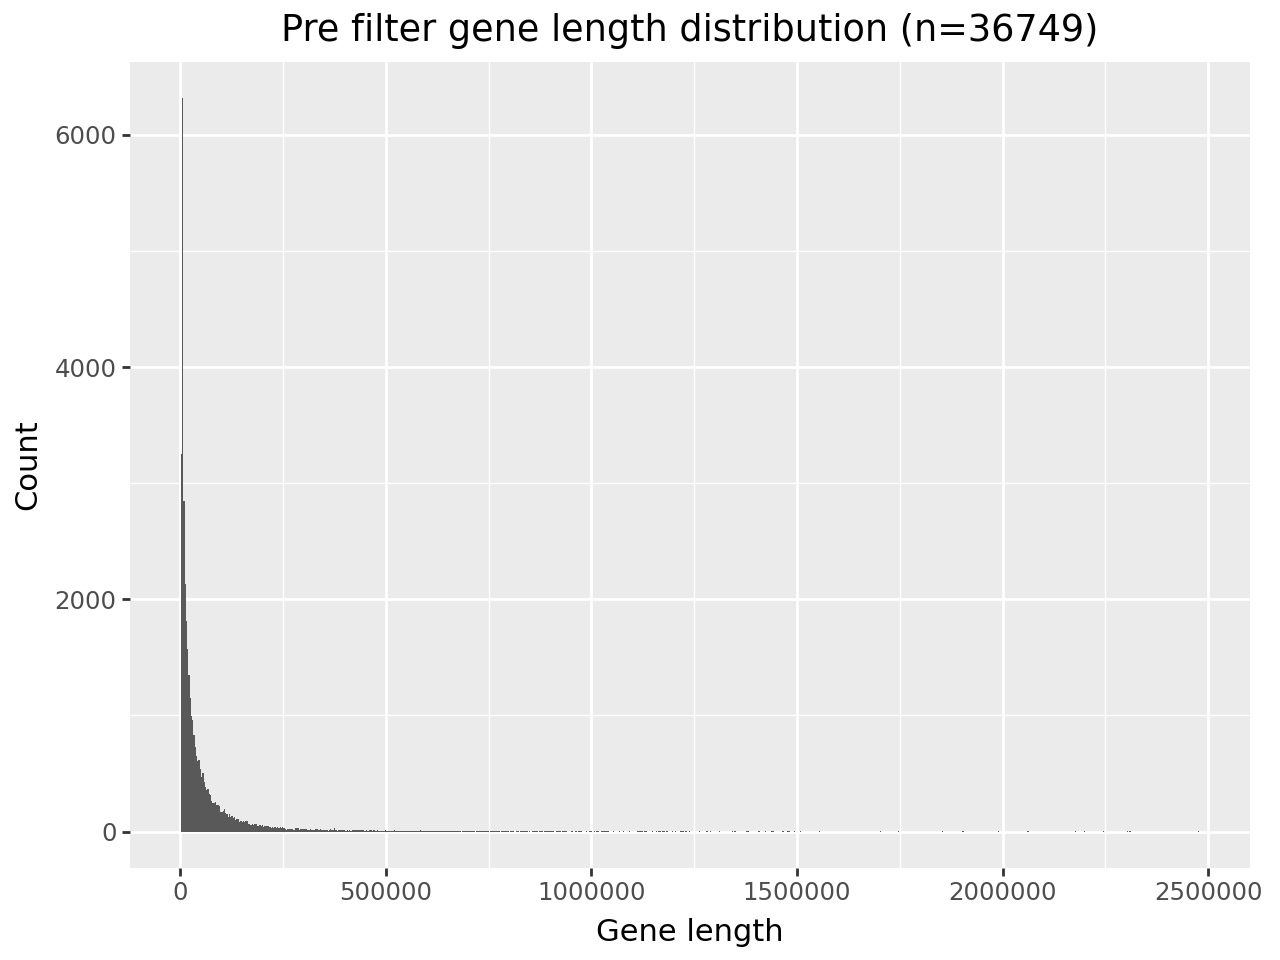

In [13]:
plot_df = df[['gene_id', 'gene_len']].drop_duplicates()
ggplot(plot_df, aes(x='gene_len')) + \
    geom_histogram() + \
    labs(title='Pre filter gene length distribution (n={})'.format(plot_df.shape[0]), x='Gene length', y='Count')

We see some very long outliers in the sizes of gigabases.
This seems to be unrealistic, since introns should not be that long.
Also we see a lot of genes (36,749) present in our data.
Let's filter this down to the smallest 2000. 

/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


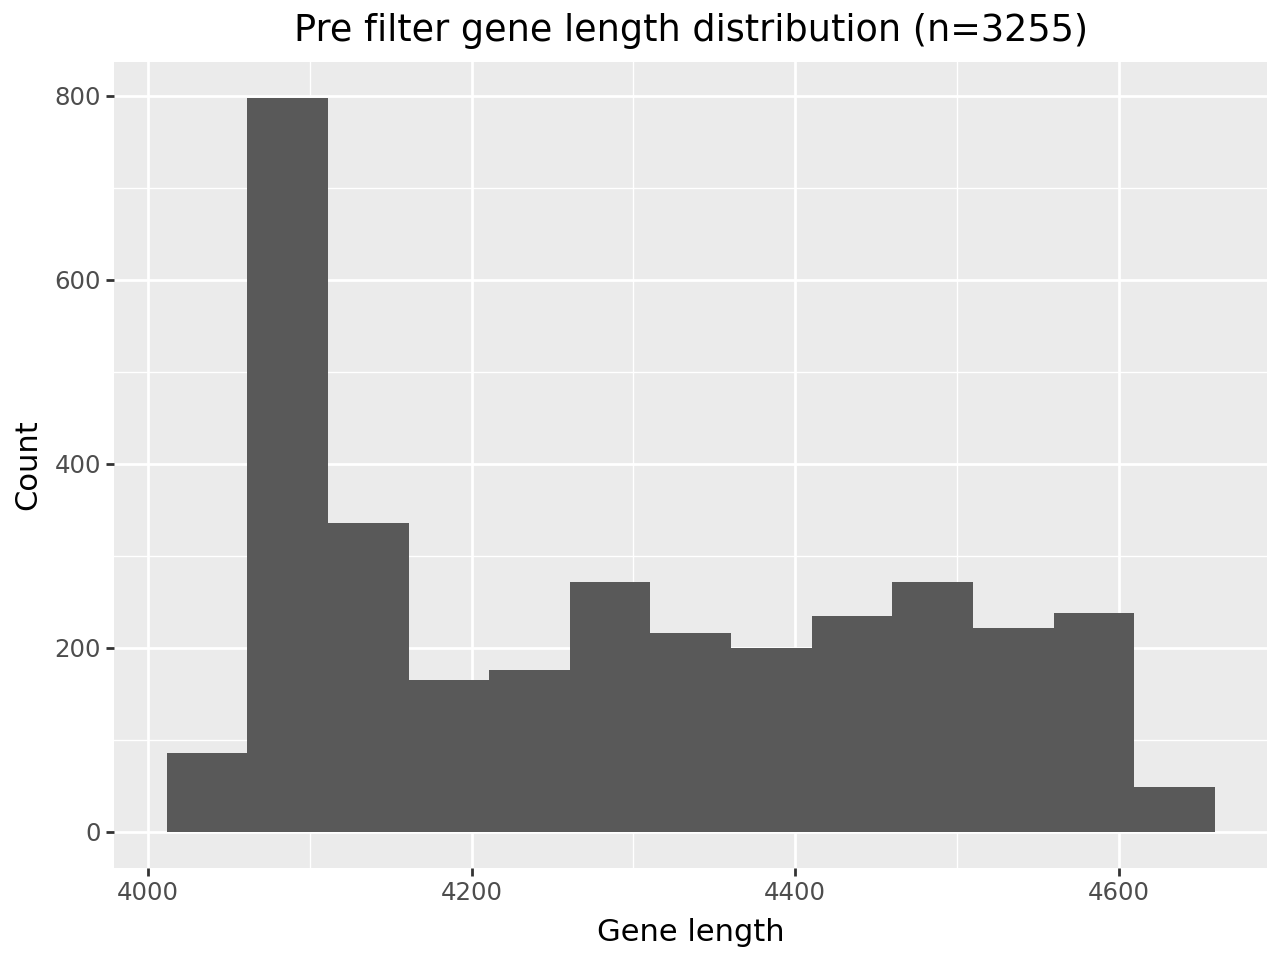

In [14]:
df = df.sort_values(by=['gene_len'])
df_small = df[:4000].copy()
plot_df = df_small[['gene_id', 'gene_len']].drop_duplicates()
ggplot(plot_df, aes(x='gene_len')) + \
    geom_histogram() + \
    labs(title='Pre filter gene length distribution (n={})'.format(plot_df.shape[0]), x='Gene length', y='Count')

Nice, let's see how these genes distribute across the chromosomes.

In [15]:
df_small[:2001]['Chromosome'].drop_duplicates()

20062             3
11124             2
66026            14
76922            17
83378            19
79769            18
87094            20
41078             7
66338            15
69390            16
33819             6
90163            22
49047            10
54663            11
25079             5
48517             9
41927             8
2343              1
88200            21
24432             4
57756            12
90970             X
62805            13
90922    KI270713.1
92618             Y
Name: Chromosome, dtype: object

Since, we only want to work with genes on the standard chromosomes, we need to ignore matches to the KI270713.1 chromosome.

In [23]:
df_small[df_small['Chromosome'] != 'KI270713.1'][['gene_id', 'gene_len']].drop_duplicates()[:2000]

,gene_id,gene_len
20062,ENSG00000239255,4024
11124,ENSG00000211593,4037
66026,ENSG00000270705,4041
76922,ENSG00000264399,4046
83378,ENSG00000283673,4046
...,...,...
87698,ENSG00000300782,4350
9066,ENSG00000290108,4350
63913,ENSG00000258968,4350
6069,ENSG00000250762,4350


Great, now we see that our threshold should be 4350.

In [25]:
threshold = 4350
df_final = df[df['Chromosome'] != 'KI270713.1'][df['gene_len'] <= threshold].copy()
df_final[['gene_id', 'gene_len']].drop_duplicates()

/tmp/ipykernel_430502/3407888067.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,gene_id,gene_len
20062,ENSG00000239255,4024
11124,ENSG00000211593,4037
66026,ENSG00000270705,4041
76922,ENSG00000264399,4046
83378,ENSG00000283673,4046
...,...,...
87698,ENSG00000300782,4350
9066,ENSG00000290108,4350
63913,ENSG00000258968,4350
6069,ENSG00000250762,4350


In [26]:
df_final

,Chromosome,Start_peak,End_peak,Start_gene,End_gene,gene_id,gene_len
20062,3,179450968,179451903,179450395,179454419,ENSG00000239255,4024
11124,2,88857898,88858638,88858568,88862605,ENSG00000211593,4037
66026,14,103206974,103207786,103205748,103209789,ENSG00000270705,4041
66022,14,103205636,103206385,103205748,103209789,ENSG00000270705,4041
66030,14,103209014,103209756,103205748,103209789,ENSG00000270705,4041
...,...,...,...,...,...,...,...
87696,21,27572452,27573325,27570454,27574804,ENSG00000300782,4350
63913,14,31018081,31018893,31016446,31020796,ENSG00000258968,4350
6069,1,167819854,167820761,167817898,167822248,ENSG00000250762,4350
87694,21,27570004,27570906,27570454,27574804,ENSG00000300782,4350


/home/mpjw/miniforge3/envs/cmscb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


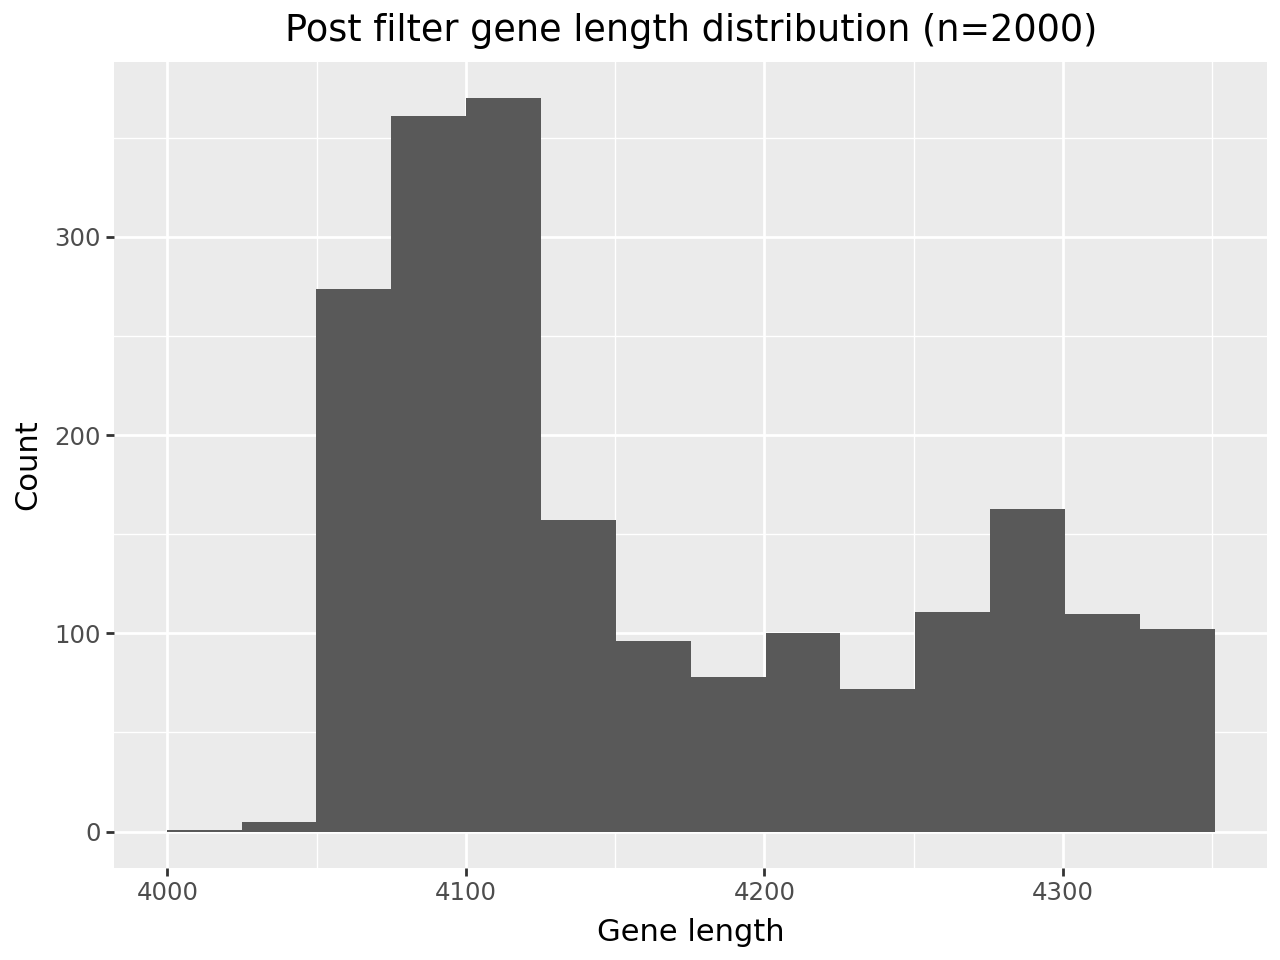

In [27]:
plot_df = df_final[['gene_id', 'gene_len']].drop_duplicates()
ggplot(plot_df, aes(x='gene_len')) +\
    geom_histogram() + \
    labs(title='Post filter gene length distribution (n={})'.format(plot_df.shape[0]), x='Gene length', y='Count')

### Amino acid composition in fasta file

In [8]:
from src.data import generate_fasta_entries
from src.data.genome import standard_chromosomes
#__package__ = 'src.data.fasta'
fasta_generator = generate_fasta_entries(
    fasta_path=data_root + 'GRCh38.d1.vd1.fa',
    only_standard_chrom=False
)

In [5]:
chrom_base_counts = {}
for chrom, seq in fasta_generator:
    base_counts = {base: seq.count(base) for base in set(seq)}
    chrom_base_counts[chrom] = base_counts


In [9]:
for chrom, counts in chrom_base_counts.items():
    if chrom in standard_chromosomes:
        print("Chromosome", chrom)
        print(counts)

Chromosome 1
{'N': 18475408, 'R': 1, 'A': 67070277, 'C': 48055043, 'T': 67244164, 'G': 48111528, 'M': 1}
Chromosome 2
{'N': 1645292, 'K': 1, 'R': 1, 'A': 71791213, 'T': 71987932, 'C': 48318180, 'G': 48450903, 'Y': 4, 'M': 1, 'W': 2}
Chromosome 3
{'N': 195417, 'R': 1, 'B': 1, 'A': 59689091, 'T': 59833302, 'C': 39233483, 'G': 39344259, 'Y': 3, 'W': 2}
Chromosome 4
{'N': 461888, 'A': 58561236, 'T': 58623430, 'C': 36236976, 'G': 36331025}
Chromosome 5
{'N': 2555066, 'A': 54053328, 'C': 35315012, 'T': 54213385, 'G': 35401468}
Chromosome 6
{'N': 727456, 'A': 51345477, 'C': 33646690, 'T': 51373025, 'G': 33713330, 'Y': 1}
Chromosome 7
{'N': 375838, 'S': 1, 'R': 1, 'A': 47058248, 'T': 47215040, 'C': 32317984, 'G': 32378859, 'Y': 2}
Chromosome 8
{'N': 370500, 'A': 43333530, 'T': 43300646, 'C': 29030173, 'G': 29103787}
Chromosome 9
{'N': 16604164, 'R': 1, 'A': 35736329, 'C': 25099811, 'T': 35783748, 'G': 25170662, 'Y': 2}
Chromosome 10
{'N': 534424, 'K': 4, 'S': 1, 'R': 13, 'B': 1, 'A': 38875926,